# Homework 2: slicing, sorting, and grouping

This homework uses the 2021 green taxi trip data filtered to only be trips with a pickup date and time on Feb. 3, 2021.  Download the file from Blackboard or from GitHub:
[https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv).  

The original unfiltered dataset is available at [https://data.cityofnewyork.us/Transportation/2021-Green-Taxi-Trip-Data-Jan-Jul-/djnb-wcxt](https://data.cityofnewyork.us/Transportation/2021-Green-Taxi-Trip-Data-Jan-Jul-/djnb-wcxt).

Answer the following questions for the data, showing all outputs of your code in the notebook. 

All plots should have an appropriate title and axis labels.

### Question 0:  Load the data

Put any import statements, and load the green taxi trip data from Feb. 3, 2021 from the CSV file or URL here.  The column `lpep_pickup_datetime` should be stored as a DateTime object.

Note:  If you have problems convert the `lpep_pickup_datetime` column to a `datetime` object using `pd.to_datetime()`, another way to do the converstion is by adding the parameter `parse_dates = ["lpep_pickup_datetime"]` to `read_csv()`.  
ex. `taxi = pd.read_csv("taxi.csv", parse_dates = ["lpep_pickup_datetime"])`

In [1]:
import pandas as pd
taxi = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv")

In [7]:
taxi['lpep_pickup_datetime'] = pd.to_datetime(taxi['lpep_pickup_datetime'])
taxi['lpep_dropoff_datetime'] = pd.to_datetime(taxi['lpep_dropoff_datetime'])

### Question 1

Create a new dataframe called `taxi2` containing only the columns `lpep_pickup_datetime`, `passenger_count`, `trip_distance`, `total_amount`, and `payment_type`.

You can use this new DataFrame for the rest of the homework, or if you get stuck on this question, just keep using the original DataFrame.

In [9]:
taxi2 = taxi[["lpep_pickup_datetime", "passenger_count", "trip_distance", "total_amount", "payment_type"]]

### Question 2

Use slicing to extract the trip distances in the third through seventh (inclusive) row of the DataFrame.

Hint:  What are the row indices for these rows?

In [16]:
taxi2.loc[3:7,:]['trip_distance']

3    6.19
4    2.74
5    1.09
6    4.18
7    5.08
Name: trip_distance, dtype: float64

### Question 3

Create a new DataFrame called `sorted_taxi` from either `taxi` or `taxi2` (the DataFrame created in Question 1) that is sorted in ascending order by total amount, then by passenger count. 

In [20]:
sorted_taxi = taxi2.sort_values(['total_amount', 'passenger_count'], ascending=True)

In [22]:
sorted_taxi

,lpep_pickup_datetime,passenger_count,trip_distance,total_amount,payment_type
1229,2021-02-03 13:42:11,1.0,0.00,-52.80,3.0
1481,2021-02-03 15:11:13,1.0,0.00,-43.30,4.0
1889,2021-02-03 17:40:34,1.0,0.96,-7.80,3.0
821,2021-02-03 11:26:33,1.0,0.00,0.00,1.0
1050,2021-02-03 12:43:19,1.0,0.00,0.00,2.0
...,...,...,...,...,...
1809,2021-02-03 17:08:34,1.0,31.95,98.92,1.0
826,2021-02-03 11:28:00,NaN,34.28,109.50,NaN
1143,2021-02-03 13:14:00,NaN,34.05,109.50,NaN
2082,2021-02-03 19:19:27,1.0,21.76,109.80,2.0


What do you notice about the `total_amount` column at the beginning of the DataFrame? 

<b>Answer:</b> The first few rows are negative amounts.

### Question 4

The `payment_type` column holds a number indicating how the passenger paid for the trip:
- 1 = credit card
- 2 = cash
- 3 = no charge
- 4 = dispute
- 5 = unknown
- 6 = voided trip

Compute the median total amount for each possible payment type.  For what number of passengers is the mean trip distance the longest?

In [27]:
median_amount_payment = taxi2.groupby('payment_type')['total_amount'].median()

In [28]:
median_amount_payment

payment_type
1.0    15.66
2.0    10.80
3.0     6.05
4.0     3.30
Name: total_amount, dtype: float64

For what payment type is the median total amount the highest?

<b>Answer</b>:  Credit card has the highest median total amount, coming out to $15.66.

Why do you think that no medians show for payment type numbers 5 (unknown) and 6 (voided trip)?

In [35]:
taxi2['payment_type'].value_counts()

1.0    821
2.0    465
3.0      8
4.0      3
Name: payment_type, dtype: int64

<b>Answer</b>: After looking into the value counts for each payment type, it appears that payment types of 5 and 6 are not represented in the data.

### Question 5

Compute the mean total amount for each hour (0-23) of Feb. 3, 2021, and plot a line graph of these means.

The hour of DateTime data can be accessed with `dt.hour`  

In [40]:
feb_3_21_data = taxi2.loc[taxi2['lpep_pickup_datetime'] >= '2021-02-03']
feb_3_21_data = feb_3_21_data.loc[feb_3_21_data['lpep_pickup_datetime'] < '2021-02-04']

In [66]:
mean_totals_by_hour = feb_3_21_data.groupby(feb_3_21_data.lpep_pickup_datetime.dt.hour).total_amount.mean()

In [67]:
mean_totals_by_hour = mean_totals_by_hour.to_frame()

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

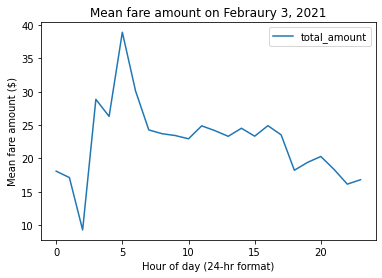

In [74]:
mean_totals_by_hour.plot()
plt.title("Mean fare amount on Febraury 3, 2021")
plt.xlabel("Hour of day (24-hr format)")
plt.ylabel("Mean fare amount ($)")
plt.show()

What trends do you notice in this graph?

<b>Answer:</b> The price is rather steady in the afternoon, but it spikes around 5am and then reduces in price gradually until the end of the day. This may be due to some early-morning rush hour traffic where the ride times are longer, hence the off-hour spike. 